<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Fetching_values_of_intermediate_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
device

'cpu'

In [38]:
x = torch.tensor(x).float().to(device)
y = torch.tensor(y).float().to(device)

In [39]:
x.device

device(type='cpu')

In [40]:
import torch.nn as nn

In [41]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output = nn.Linear(8,1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output(x)
        return x 

In [42]:
torch.random.manual_seed(10)
mynet = MyNeuralNet().to(device)

In [43]:
mynet.parameters()

<generator object Module.parameters at 0x7ff651c2b270>

In [44]:
temp = mynet.hidden_to_output.parameters()

for t in temp:
    print(t)

Parameter containing:
tensor([[-0.3459, -0.3293, -0.2678, -0.3189, -0.3317,  0.1550,  0.2169,  0.2389]],
       requires_grad=True)
Parameter containing:
tensor([0.1905], requires_grad=True)


In [45]:
loss = nn.MSELoss()

In [46]:
from torch.optim import SGD

opt = SGD(mynet.parameters(), lr = 0.001)

In [47]:
loss_history = [] 

for _ in range(50):
    opt.zero_grad()
    y_pred = mynet(x)
    loss_value = loss(y_pred, y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

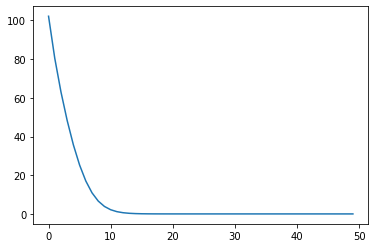

In [48]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

0.01476825401186943

In [24]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [25]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [27]:
import torch.nn as nn

In [28]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [29]:
torch.random.manual_seed(10)
mynet = MyNeuralNet().to(device)

In [30]:
loss_func = nn.MSELoss()

In [31]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(102.1544, grad_fn=<MseLossBackward>)


In [32]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [33]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

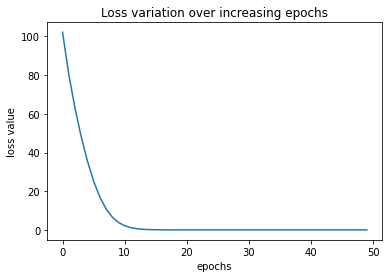

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

### 1. Fetching intermediate values by directly calling the intermediate layer

In [12]:
mynet.input_to_hidden_layer(X)

tensor([[-4.0139e-01,  7.2155e-03, -4.9131e-01,  1.4615e+00, -3.8093e-01,
         -7.1646e-01,  4.6765e-01,  2.0814e+00],
        [-5.6844e-01, -2.2575e-01, -1.5498e+00,  3.1695e+00, -5.2755e-01,
         -7.3935e-01,  1.9716e+00,  5.3073e+00],
        [-7.3548e-01, -4.5871e-01, -2.6083e+00,  4.8776e+00, -6.7418e-01,
         -7.6225e-01,  3.4756e+00,  8.5332e+00],
        [-9.0252e-01, -6.9167e-01, -3.6667e+00,  6.5856e+00, -8.2080e-01,
         -7.8514e-01,  4.9795e+00,  1.1759e+01]], grad_fn=<AddmmBackward>)

### 2. Fetching intermediate values by returning them in `nn.Module` definition

Text(0, 0.5, 'loss value')

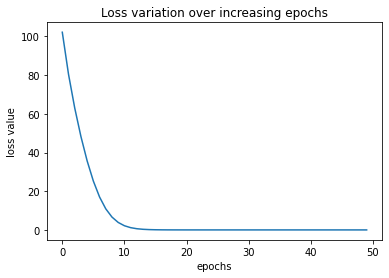

In [13]:
torch.random.manual_seed(10)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        x = self.hidden_to_output_layer(hidden2)
        return x, hidden1

mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
_Y, _Y_hidden = mynet(X)
loss_value = loss_func(_Y,Y)
opt = SGD(mynet.parameters(), lr = 0.001)
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X)[0],Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [14]:
mynet(X)[1]

tensor([[-4.0139e-01,  7.2155e-03, -4.9131e-01,  1.4615e+00, -3.8093e-01,
         -7.1646e-01,  4.6765e-01,  2.0814e+00],
        [-5.6844e-01, -2.2575e-01, -1.5498e+00,  3.1695e+00, -5.2755e-01,
         -7.3935e-01,  1.9716e+00,  5.3073e+00],
        [-7.3548e-01, -4.5871e-01, -2.6083e+00,  4.8776e+00, -6.7418e-01,
         -7.6225e-01,  3.4756e+00,  8.5332e+00],
        [-9.0252e-01, -6.9167e-01, -3.6667e+00,  6.5856e+00, -8.2080e-01,
         -7.8514e-01,  4.9795e+00,  1.1759e+01]], grad_fn=<AddmmBackward>)